<a href="https://colab.research.google.com/github/Jayraj-Khinvasara/Analysis-using-ML/blob/main/Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [3]:
#Data prepration

df = pd.read_csv('data.csv')

# Drop rows with missing values
df = df.dropna()

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Feature and target separation
X = df[['Units Sold', 'Unit Price']]
y = df['Total Revenue']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

#Feature Selection

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)


y_pred_linear = linear_reg.predict(X_test_scaled)

# Evaluation
print("Linear Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("R^2 Score:", r2_score(y_test, y_pred_linear))


Linear Regression
Mean Squared Error: 22732.78095274601
R^2 Score: 0.8033879443610601


In [8]:
# Polynomial Features Transformation
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Polynomial Regression Model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Predictions
y_pred_poly = poly_reg.predict(X_test_poly)

# Evaluation
print("Polynomial Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_poly))
print("R^2 Score:", r2_score(y_test, y_pred_poly))


Polynomial Regression
Mean Squared Error: 7.362926771766786e-25
R^2 Score: 1.0


In [9]:
from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regression Model
tree_reg = DecisionTreeRegressor(random_state=0)
tree_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_tree = tree_reg.predict(X_test_scaled)

# Evaluation
print("Decision Tree Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_tree))
print("R^2 Score:", r2_score(y_test, y_pred_tree))


Decision Tree Regression
Mean Squared Error: 6459.484112499999
R^2 Score: 0.9441329922473789


In [10]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Regression Model
forest_reg = RandomForestRegressor(n_estimators=100, random_state=0)
forest_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_forest = forest_reg.predict(X_test_scaled)

# Evaluation
print("Random Forest Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_forest))
print("R^2 Score:", r2_score(y_test, y_pred_forest))


Random Forest Regression
Mean Squared Error: 8665.636392543356
R^2 Score: 0.9250523467366737


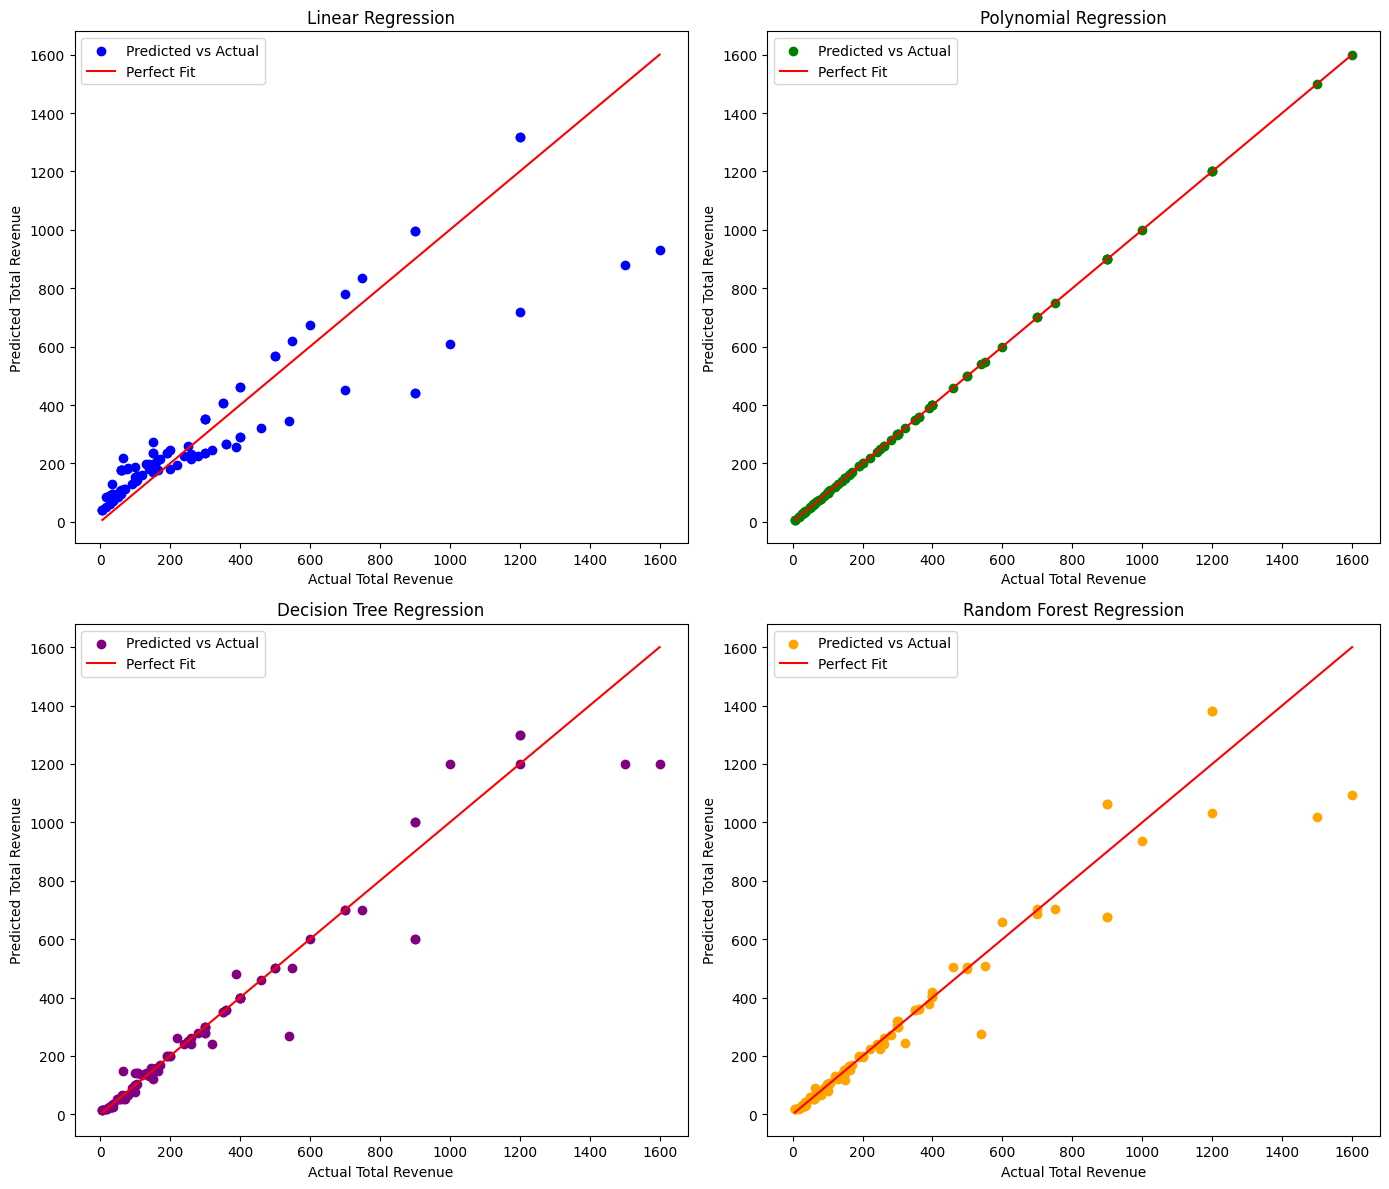

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 12))

# Linear Regression
axs[0, 0].scatter(y_test, y_pred_linear, color='blue', label='Predicted vs Actual')
axs[0, 0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Fit')
axs[0, 0].set_title('Linear Regression')
axs[0, 0].set_xlabel('Actual Total Revenue')
axs[0, 0].set_ylabel('Predicted Total Revenue')
axs[0, 0].legend()

# Polynomial Regression
axs[0, 1].scatter(y_test, y_pred_poly, color='green', label='Predicted vs Actual')
axs[0, 1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Fit')
axs[0, 1].set_title('Polynomial Regression')
axs[0, 1].set_xlabel('Actual Total Revenue')
axs[0, 1].set_ylabel('Predicted Total Revenue')
axs[0, 1].legend()

# Decision Tree Regression
axs[1, 0].scatter(y_test, y_pred_tree, color='purple', label='Predicted vs Actual')
axs[1, 0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Fit')
axs[1, 0].set_title('Decision Tree Regression')
axs[1, 0].set_xlabel('Actual Total Revenue')
axs[1, 0].set_ylabel('Predicted Total Revenue')
axs[1, 0].legend()

# Random Forest Regression
axs[1, 1].scatter(y_test, y_pred_forest, color='orange', label='Predicted vs Actual')
axs[1, 1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Fit')
axs[1, 1].set_title('Random Forest Regression')
axs[1, 1].set_xlabel('Actual Total Revenue')
axs[1, 1].set_ylabel('Predicted Total Revenue')
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()
plt.show()
